first import the libraries

In [139]:
%pip install pandas matplotlib numpy

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

Note: you may need to restart the kernel to use updated packages.


downloading Data 

In [140]:
r"C:\Users\A.T\Downloads\housePrice.csv"

'C:\\Users\\A.T\\Downloads\\housePrice.csv'

load Data for read

In [141]:
import pandas as pd

df = pd.read_csv('C:\\Users\\A.T\\Downloads\\housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [142]:
cdf= df[['Area','Room','Parking','Warehouse','Elevator','Address','Price','Price(USD)']]
cdf.head(11)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [143]:
# حذف خانه‌هایی که آدرس ندارند
cdf_cleaned = cdf.dropna(subset=['Address'])

# حذف کاماها و تبدیل ستون 'Area' به float
cdf_cleaned['Area'] = cdf_cleaned['Area'].str.replace(',', '').astype(float)

# حذف خانه‌هایی که متراژ آنها بسیار بزرگ است (فرض می‌کنیم متراژ بیش از 1000 متر مربع غیرمنطقی است)
cdf_cleaned = cdf_cleaned[cdf_cleaned['Area'] <= 1000]

# نمایش دیتاست تمیز شده
cdf_cleaned.head()

C:\Users\A.T\AppData\Local\Temp\ipykernel_3516\570032504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_cleaned['Area'] = cdf_cleaned['Area'].str.replace(',', '').astype(float)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


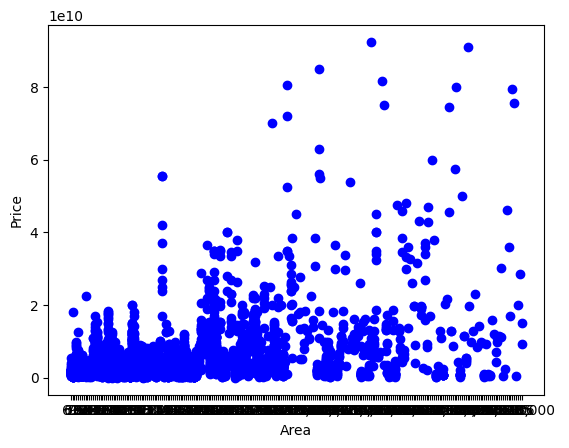

In [144]:
plt.scatter(cdf.Area,cdf.Price,color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Train & Test Dataset

In [145]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

Train Data Distribeution

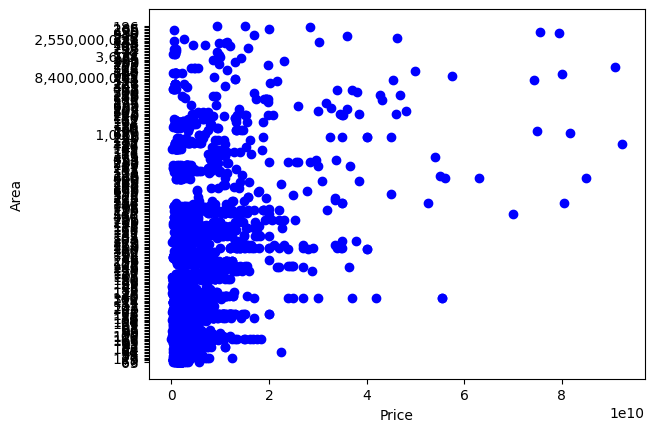

In [146]:
plt.scatter(train.Price, train.Area, color='blue')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

For multiple Regression Model

In [147]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Price']])
y = np.asanyarray(train[['Price(USD)']])
regr.fit(x, y)
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficient: [[3.33333333e-05]]
Intercept: [0.00011674]


Prediction

In [148]:
# Ensure the necessary imports are included
from sklearn import linear_model

# Initialize the linear regression model
regr = linear_model.LinearRegression()

# Prepare the training data
x_train = np.asanyarray(train[['Price']])
y_train = np.asanyarray(train[['Price(USD)']])

# Fit the model on the training data
regr.fit(x_train, y_train)

# Prepare the test data
x_test = np.asanyarray(test[['Price']])
y_test = np.asanyarray(test[['Price(USD)']])

# Print the coefficients
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

# Calculate and print the variance score
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficient: [[3.33333333e-05]]
Intercept: [0.00011674]
Variance score: 1.00


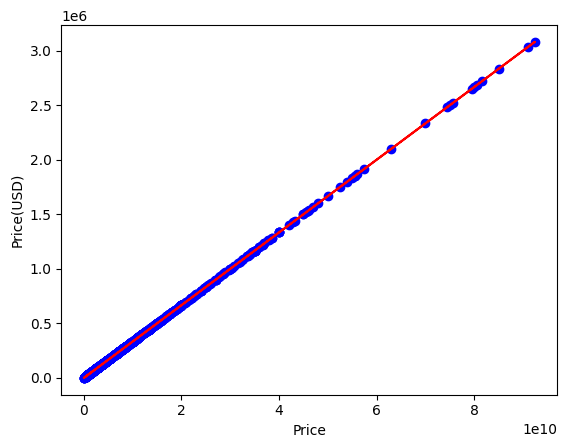

In [149]:
# Plot the results
plt.scatter(train.Price, train['Price(USD)'], color='blue')
plt.plot(train.Price, regr.coef_[0][0]*train.Price + regr.intercept_[0], '-r')
plt.xlabel('Price')
plt.ylabel('Price(USD)')
plt.show()